In [ ]:
## import utility libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

# read csv files
df_train = pd.read_csv('./data/development.csv', sep = ',')
df_test = pd.read_csv('./data/evaluation.csv', sep = ',')

# STEP. 1: DATA EXPLORATION

# i have no missing values in my development set
df_train.isnull().sum()
df_test.isnull().sum()

In [3]:
df_train.head()

,text,class
0,Non è l'hotel più lussuoso in cui abbia mai so...,pos
1,Siamo stati qui per 1 notte prima della nostra...,pos
2,Hotel è ben posizionato per visitare Torino. A...,pos
3,All'arrivo la cordialità e disponibilità dello...,pos
4,Abbiamo soggiornato per due notti alla fine de...,pos


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 2 columns):
text     28754 non-null object
class    28754 non-null object
dtypes: object(2)
memory usage: 449.4+ KB


In [5]:
df_train.describe()

,text,class
count,28754,28754
unique,28754,2
top,Abitando in città mi è capitato di frequentare...,pos
freq,1,19532


pos    19532
neg     9222
Name: class, dtype: int64


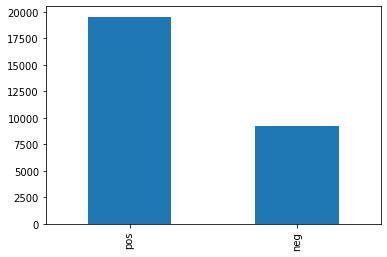

In [6]:
# problem balanced? there are a lot more positive reviews rather than negative
print(df_train['class'].value_counts())
df_train['class'].value_counts().plot(kind='bar')

624.5674278107721
58
7800
513.6230925334596

864.228475384949
67
9153
740.8239343333894


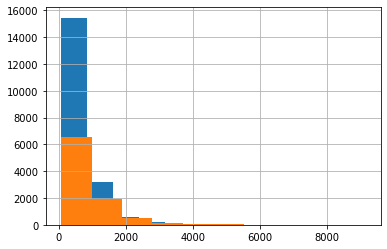

In [7]:
# mean review length
# positive mean length
aus = df_train.loc[df_train['class'] == 'pos']
# characterizing distribution
print(aus.text.str.len().mean())
print(aus.text.str.len().min())
print(aus.text.str.len().max())
print(aus.text.str.len().std())
aus.text.str.len().hist()

print()

# negative mean length
aus = df_train.loc[df_train['class'] == 'neg']
# characterizing distribution
print(aus.text.str.len().mean())
print(aus.text.str.len().min())
print(aus.text.str.len().max())
print(aus.text.str.len().std())
aus.text.str.len().hist()

# insight: negative reviews are generally longer

In [163]:
import spacy
nlp = spacy.load("it_core_news_sm", disable=['ner', 'parser'])

x = df_train['text']
all_reviews =""
for row in x.iteritems(): 
    review = row[1]
    invalid = string.punctuation + '\n'
    translator = str.maketrans(invalid, ' '*len(invalid)) #map punctuation to space
    review = review.translate(translator)
    all_reviews += review.lower() + " " 

set_of_words = set(all_reviews.split(" "))
list_set_of_words = list(set_of_words)
str_set_of_words = "";
str_set_of_words = ' '.join(list_set_of_words)

list_myvocabulary = [(x.text,x.pos_,x.lemma_) for x in nlp(str_set_of_words)]
my_vocabulary = pd.DataFrame(dic, columns = ['base', 'pos', 'lemma'])
my_vocabulary = my_vocabulary.drop_duplicates(subset=['base'])
my_vocabulary_unique_words = set(my_vocabulary['base']) #speed up

In [191]:
# base: lemma
my_dict_lemmas = {row[0]: row[2] for row in my_vocabulary.values}
# base: pos
my_dict_pos = {row[0]: row[1] for row in my_vocabulary.values}

In [190]:
my_dict_pos['esser']

'essere'

In [317]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw
import string
import re


# STEP 2: PREPROCESSING
x = df_train['text']
y = df_train['class']

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def hasVowels(inputString):
    vowels = {"a", "e", "i", "o", "u", "A", "E", "I", "O", "U"}
    return any(char in vowels for char in inputString)

def isAlphabetical(inputString):
    regex = '[a-zA-Z]+'
    return re.match(regex, inputString)

class LemmaTokenizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, document): 
        lemmas = []
        stemmer = SnowballStemmer("italian")
        
        translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
        document.translate(translator)
        
        #tagger = treetaggerwrapper.TreeTagger(TAGLANG='it')
        for t in word_tokenize(document):
            t = t.strip()
            valid = True
            
            if (hasNumbers(t) or not hasVowels(t) or len(t) < 3 or len(t) > 15 or not isAlphabetical(t)):
                valid = False
            else:
                t = t.lower()
                if (t in my_dict_lemmas.keys()):
                    lemma = my_dict_lemmas[t]
                    lemma = stemmer.stem(lemma)
                    lemmas.append(lemma)
        return lemmas

#list_sw = ['piu','tutt','colazion','posizion','bagn','molt','dar','neo','esser','essere','aver', 'avere','personal','hotel','camer','abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avro', 'avut', 'com', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'stett', 'stetter', 'sti', 'stiam', 'vostr']
list_sw_bigram = ['tutt','dar','neo','esser','essere','aver', 'avere','personal','abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avro', 'avut', 'com', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'stett', 'stetter', 'sti', 'stiam', 'vostr']
stopwords = sw.words('italian')+ list_sw_bigram
tokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer = tokenizer,stop_words=stopwords,encoding='utf-8',lowercase=True, min_df = 2, max_df = 0.5, ngram_range = (1,2), strip_accents = 'unicode', sublinear_tf = True) 
X_tfidf = vectorizer.fit_transform(x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['contr', 'dio', 'piu'] not in stop_words.
  ngrams_append(w[offset:offset + n])


In [ ]:
vectorizer = CountVectorizer(tokenizer = tokenizer,stop_words=stopwords,encoding='utf-8',lowercase=True, min_df = 10, max_df = 0.8, ngram_range = (2,3), strip_accents = 'unicode', analyzer='word')
counter = vectorizer.fit_transform(x)
transformer = TfidfTransformer()
X_tfidf = vectorizer.fit_transform(counter) #sublinear_tf = True)

In [183]:
# 
"""
import scipy
col_length = np.array(df_train.text.str.len())
X = scipy.sparse.hstack([X_tfidf, col_length])
"""

(28754, 27733)

Number of components = 10 and explained variance = 0.02202674072124781
Number of components = 20 and explained variance = 0.03422575890364556
Number of components = 30 and explained variance = 0.04460289029387433
Number of components = 40 and explained variance = 0.053743271223916894
Number of components = 50 and explained variance = 0.06235783033549241


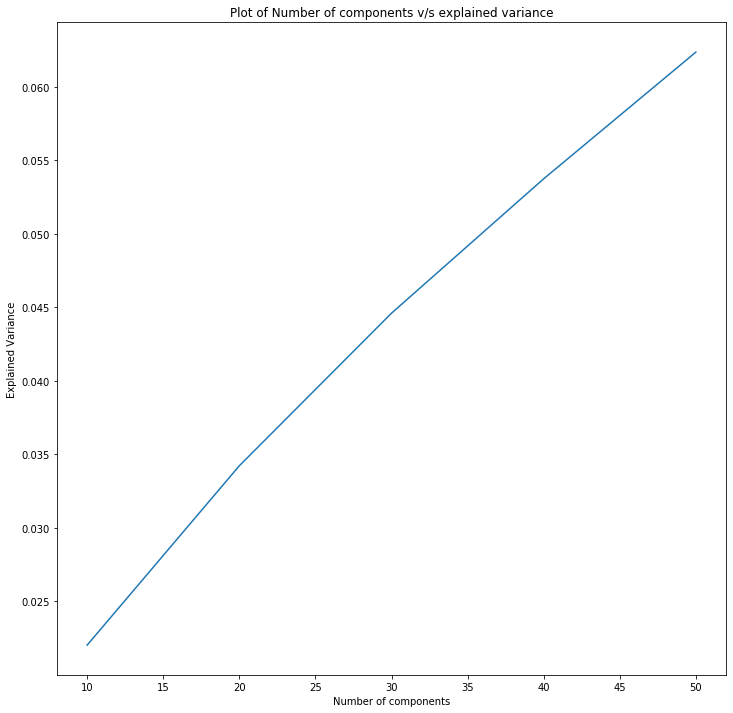

In [226]:
# Dimensionality reduction -  svd for sparse matrices
from sklearn.decomposition import TruncatedSVD


# Program to find the optimal number of components for Truncated SVD
n_comp = [10, 20,30,40,50]#,1500,2000,2500,3000,3500] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_tfidf)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

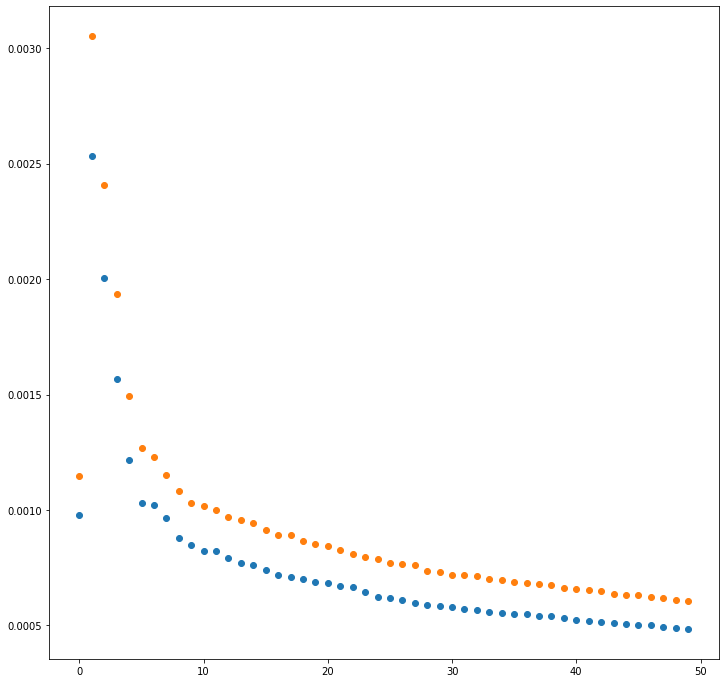

In [318]:
from sklearn.decomposition import TruncatedSVD

def dimensionalityReduction(data, components):
    svd = TruncatedSVD(n_components=components, random_state=42)
    reduced_data = svd.fit_transform(data)
    plt.plot(svd.explained_variance_ratio_, marker='o', linestyle='')
    return reduced_data

n_components = 50
# train
X_tfidf_red = dimensionalityReduction(X_tfidf, n_components)

#test
x_test = df_test['text']
x_tf_idf_test = vectorizer.fit_transform(x_test)
X_tfidf_test_red = dimensionalityReduction(x_tf_idf_test, n_components)

In [320]:
# Numerize target variable y
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y = lb_make.fit_transform(y)

In [321]:
# check polarization
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
%matplotlib inline

def generate_wordclouds(my_tf_idf, word_positions, sentiment):
    top_count = 100
    tfidf = my_tf_idf
    tfidf_sum = np.sum(tfidf, axis=0) # numpy.matrix
    tfidf_sum = np.asarray(tfidf_sum).reshape(-1) # numpy.array of shape (1, X.shape[1])
    top_indices = tfidf_sum.argsort()[-top_count:]
    term_weights = {word_positions[idx]: tfidf_sum[idx] for idx in top_indices}
    wc = WordCloud(width=1200, height=800, background_color="white")
    wordcloud = wc.generate_from_frequencies(term_weights)
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off") 
    fig.suptitle(f"Sentiment {sentiment}")

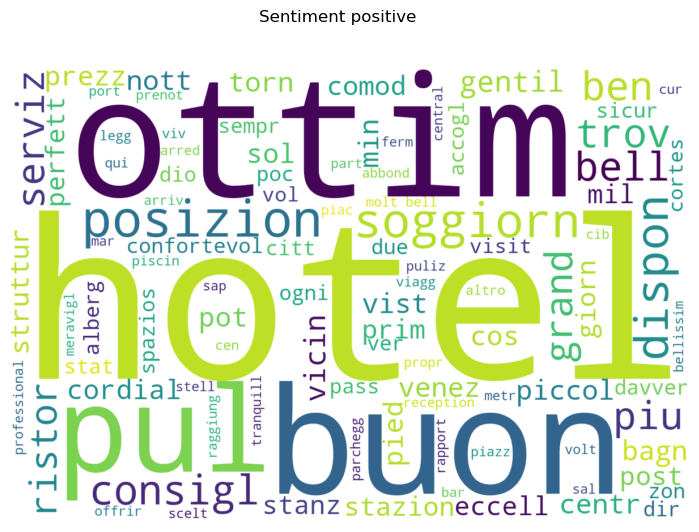

In [322]:
pos = df_train.loc[df_train['class'] == 'pos']
x_pos = pos['text']
X_tfidf_pos = vectorizer.fit_transform(x_pos)
word_positions = {v: k for k, v in vectorizer.vocabulary_.items()} 

# generate wordclouds for positive reviews
generate_wordclouds(X_tfidf_pos, word_positions, "positive")

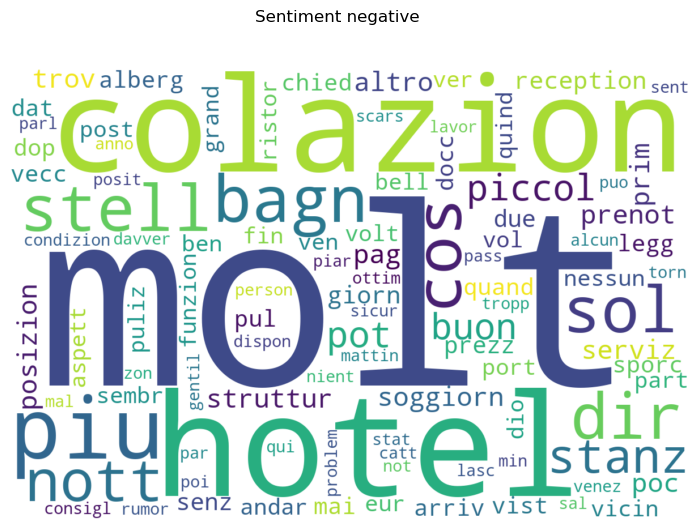

In [323]:
neg = df_train.loc[df_train['class'] == 'neg']
x_neg = neg['text']
X_tfidf_neg = vectorizer.fit_transform(x_neg)

word_positions = {v: k for k, v in vectorizer.vocabulary_.items()} 

# generate wordclouds for negative reviews
generate_wordclouds(X_tfidf_neg, word_positions, "negative")

In [28]:
# Select best config (TODO OVER F1)
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


params = {
     "n_estimators" : [100],
     "max_depth": [None, 10, 20, 50,100],
     "random_state": [42],
     "class_weight": [{1:2, 0:1}] #unbalanced problem
    
    
     #"min_impurity_decrease": [0, .01, .03, .07, .09, .11],
     #"min_samples_leaf": [1,10, 20],
     #"max_features" : ["auto", 1000, 3000],
     #"bootstrap": [True, False],
}

X_train_valid, X_test,y_train_valid, y_test = train_test_split(X_tfidf_red, y, stratify=y)
kf = KFold(5)
accuracies = []
for config in ParameterGrid(params):
    clf_accuracies = []
    counts = []
    for train_indices, valid_indices in kf.split(X_train_valid):
         X_train = X_train_valid[train_indices]
         y_train = y_train_valid[train_indices]
         X_valid = X_train_valid[valid_indices]
         y_valid = y_train_valid[valid_indices]
         # keep track of the number of elements in each split
         counts.append(len(train_indices))
         model = RandomForestClassifier(**config)
         model.fit(X_train, y_train)
         acc = accuracy_score(y_valid, model.predict(X_valid))
         clf_accuracies.append(acc)
    accuracies.append(np.average(clf_accuracies, weights=counts))
    
best_config = list(ParameterGrid(params))[np.argmax(accuracies)]

In [29]:
best_config = list(ParameterGrid(params))[np.argmax(accuracies)]
model = RandomForestClassifier(**best_config)
model.fit(X_train_valid, y_train_valid)
accuracy_score(y_test, model.predict(X_test))
best_config

{'class_weight': {1: 2, 0: 1},
 'max_depth': None,
 'n_estimators': 100,
 'random_state': 42}

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [274]:
# STEP 3.1 - Classification - RANDOM FOREST
best_config = {
 'class_weight':"balanced",
 'max_depth': 100,
 'n_estimators': 100,
 'random_state': 42}

model = RandomForestClassifier(**best_config)
model.fit(X_tfidf_red, y)

f1 = cross_val_score(model, X_tfidf_red, y, cv=5, scoring='f1')
print(f1)

y_pred_forest = model.predict(X_tfidf_test_red)
dumpToFile(y_pred_forest, "submission_forest.csv")

[0.94687815 0.9502997  0.94347663 0.94783378 0.94402004]


In [324]:
# STEP 3.2 - Classification - SVM

classifier_linear = svm.SVC(kernel='linear',probability = True, class_weight="balanced")
classifier_linear.fit(X_tfidf_red, y)

#f1 = cross_val_score(classifier_linear, X_tfidf_red, y, cv=5, scoring='f1')
#print(f1)

y_pred_svm = classifier_linear.predict(X_tfidf_test_red)
dumpToFile(y_pred_svm, "submission_svm.csv")

In [276]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=0, class_weight="balanced")
linear_svc.fit(X_tfidf_red, y)

f1 = cross_val_score(classifier_linear, X_tfidf_red, y, cv=5, scoring='f1')
print(f1)

y_pred_svclinear = linear_svc.predict(X_tfidf_test_red)
dumpToFile(y_pred_svclinear, "submission_svclinear.csv")

[0.95210678 0.95621671 0.9490421  0.94838879 0.95129913]


In [220]:
# combination of the three trained classifiers
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('svc', linear_svc), ('rf', model), ('gnb', classifier_linear)], voting='soft', weights=[2,1,2])
ensemble = ensemble.fit(X_tfidf_red, y)
y_pred_esemble = ensemble.predict(X_tfidf_test_red)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [ ]:
"""from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])
pipeline.fit(x, y)
y_pred_nb = pipeline.predict(x_test)
dumpToFile(y_pred_nb)"""

In [302]:
import csv
def dumpToFile(predictions, filename):
    index = 0
    with open(filename, encoding = 'utf-8', mode='w') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Id", "Predicted"])
        for el in predictions:
            if el == 1:
                label = 'pos'
            elif el == 0:
                label = 'neg'
            writer.writerow([index, label])
            index += 1

array([1.55898937, 0.73607413])